# Cardio Zeclinics

In [32]:
#!pip install readlif

Imports

In [23]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join
import time

import matplotlib.pyplot as plt


In [24]:
def read(path):
    start=time.time()

    path_files = [f for f in listdir(path)]
    num_files=len(path_files)
    img_arrays= [None] * num_files
    for i in range(num_files):
        files = [f for f in listdir(path+"/"+path_files[i]) if isfile(join(path+"/"+path_files[i], f))]
        num_frames=len(files)
        frames_arrays= [None] * num_frames
        for j in range(num_frames):
            frames_arrays[j]=np.load(path+"/"+path_files[i]+"/"+files[j])
        img_arrays[i]=frames_arrays

    print("Elapsed time = ", time.time()-start)
    return img_arrays

In [38]:
path = './CARDIO_videos'
frames = read(path)

NotADirectoryError: [Errno 20] Not a directory: './CARDIO_videos/20170102_SME_085.lif'

In [35]:
plt.imshow(frames[0][0],cmap='gray')

NameError: name 'frames' is not defined

Preprocessing per centrar les imagges i passar de (482,408) a (256,256) centrantnos en el corasón

In [54]:
def find_top_corner(in_shape,center_idx,out_shape):
  # out shape = 1 number, shape of dimensions
  # in shape = array of input dimensions

  top_left = [center_idx[0] - (out_shape/2),center_idx[1]-(out_shape/2)]

  if center_idx[1]+out_shape/2 > in_shape[1]: # dreta
    diff = center_idx[1]+out_shape/2 - in_shape[1]
    top_left[1] -= diff
  if center_idx[1]-out_shape/2 < 0: # esquerra
    diff = 0 - center_idx[1]-out_shape/2
    top_left[1] += diff
  if center_idx[0]-out_shape/2 < 0: # top
    diff = 0 - center_idx[0]-out_shape/2
    top_left[0] += diff
  if center_idx[0]+out_shape/2 > in_shape[0]: # bottom
    diff = center_idx[0]+out_shape/2-in_shape[0]
    top_left[0] -= diff

  return top_left

In [56]:
def center_img(img,out_shape,top_left):
    img = img[int(top_left[0]):int(top_left[0]+out_shape),int(top_left[1]):int(top_left[1]+out_shape)]
    return img

In [57]:
out_shape = 256
img_0 = np.uint16(np.array(frames[0][0],dtype="object"))
center = np.unravel_index(np.argmax(img_0, axis=None), img_0.shape)
top_left = find_top_corner(img_0.shape,center,out_shape)

centered_frames = [center_img(tv,out_shape,top_left) for tv in frames[0]]


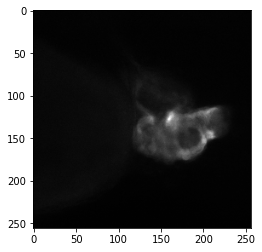

In [60]:
plt.imshow(centered_frames[0],cmap='gray')

In [64]:
frames = centered_frames

## Active Contours

### Active Contours:

ventricle:

In [84]:
!pip3 install scikit-image

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.4 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 5.0 MB/s eta 0:00:01
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


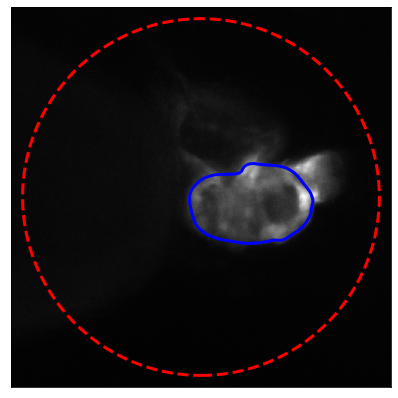

In [69]:
import skimage
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = frames[0]

s = np.linspace(0, 2*np.pi, 400)
r = out_shape/2 + 120*np.sin(s)
c = out_shape/2 + 120*np.cos(s)
init = np.array([r, c]).T

# alpha = 0.05 si uint8 -> contracta mes rapid i troba el ventricle
snake = active_contour(img,
                       init, alpha=0.03, beta=0.5, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

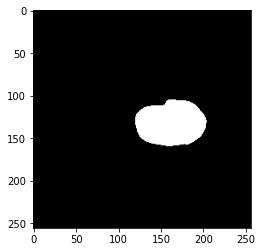

In [70]:
import cv2
# Treure la MASK a partir de SNAKE
mask0 = np.zeros((256,256))
pts = snake.astype(int)
pts2 = np.array(list(pts))
#Important to put the brackets []!!!!
mask = cv2.fillPoly(mask0 , [pts2], (255))

plt.imshow(mask, cmap='gray')

255.0

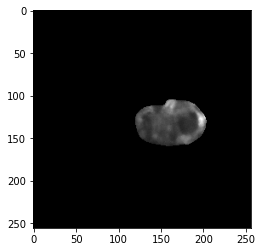

In [71]:
plt.imshow(img*mask, cmap='gray')
a = img*mask
mask[150,150]

auricula:


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  if sys.path[0] == '':


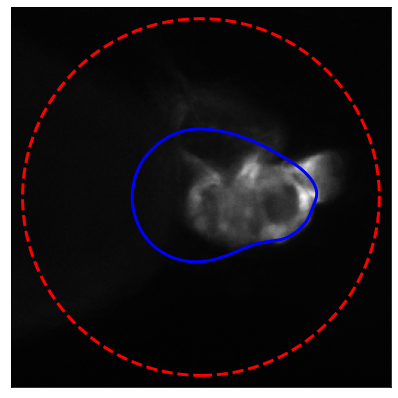

In [72]:
from skimage.segmentation import active_contour


img = frames[0]

s = np.linspace(0, 2*np.pi, 400)
r = out_shape/2 + 120*np.sin(s)
c = out_shape/2 + 120*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(img,
                       init, alpha=0.02, beta=2, gamma=0.001,max_iterations = 200)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

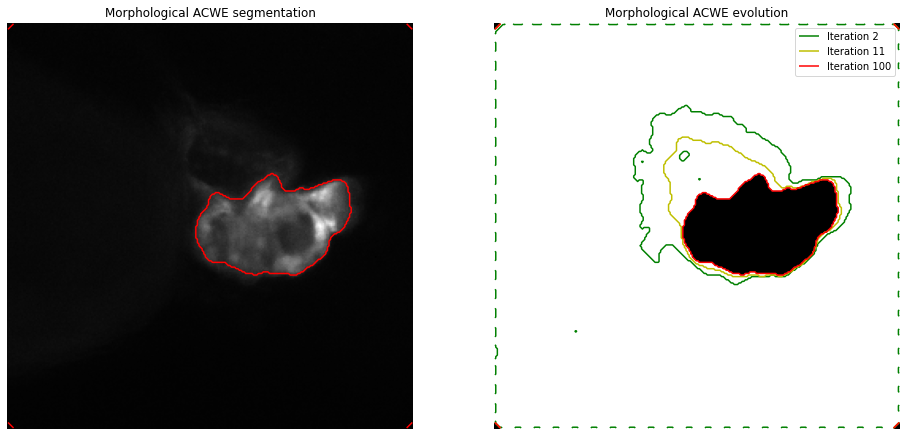

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = frames[0]

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[20], [0.5], colors='y')
contour.collections[0].set_label("Iteration 11")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 100")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

plt.show()

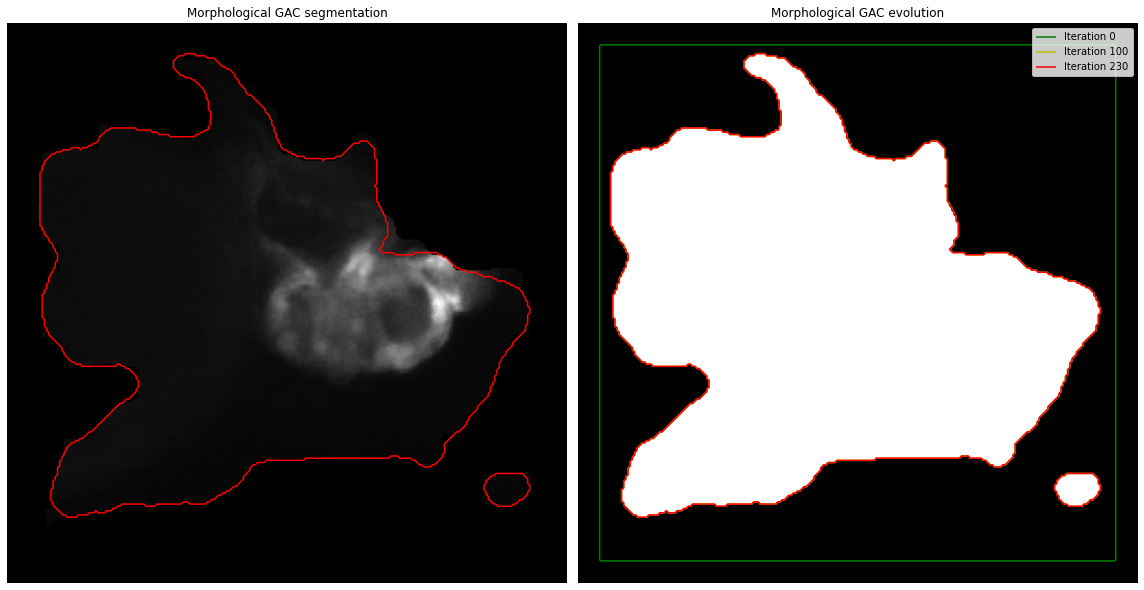

In [79]:

# Morphological GAC
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, 2000, init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological GAC segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[1].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[1].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[1].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

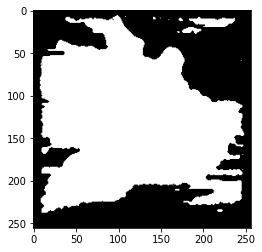

In [75]:
plt.imshow(ls)
plt.imshow(ls,cmap='gray')

In [76]:
from scipy import ndimage
struct1 = np.ones((11,11))
struct1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

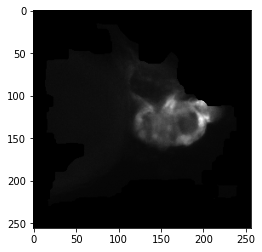

In [77]:
ls_dilated = ndimage.binary_erosion(ls,structure=struct1).astype(ls.dtype)
auricula = image*ls_dilated
plt.imshow(auricula,cmap='gray')

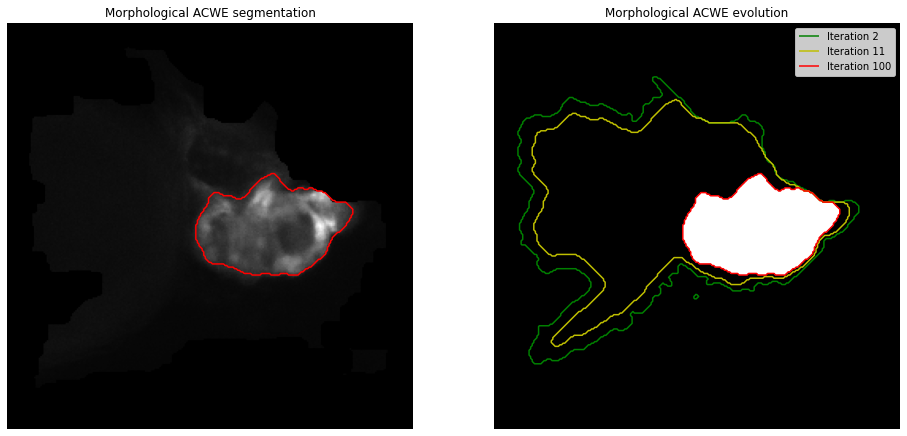

In [78]:

# Morphological ACWE
image = auricula

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 500, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[11], [0.5], colors='y')
contour.collections[0].set_label("Iteration 11")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 100")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

plt.show()

In [ ]:
# Aqui comensa la festa:

In [39]:
import sys
sys.path.append('./Cardio/')
import preprocess as p

In [42]:
path = './CARDIO_videos/20170102_SME_085.lif'
out = p.lifpreprocess(path)

In [50]:
frames = out[0]
out_shape = 256

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


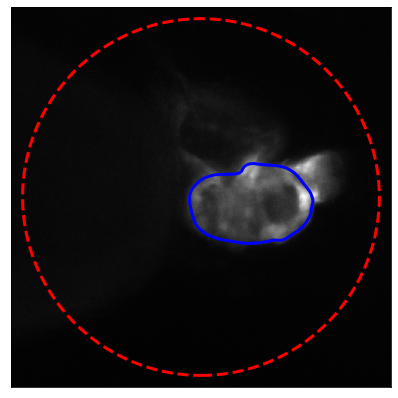

In [51]:
import skimage
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = frames[0]

s = np.linspace(0, 2*np.pi, 400)
r = out_shape/2 + 120*np.sin(s)
c = out_shape/2 + 120*np.cos(s)
init = np.array([r, c]).T

# alpha = 0.05 si uint8 -> contracta mes rapid i troba el ventricle
snake = active_contour(img,
                       init, alpha=0.03, beta=0.5, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

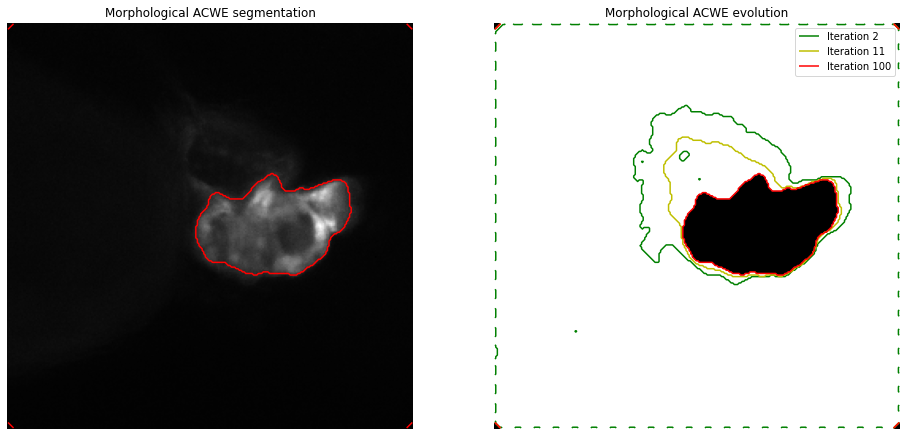

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = frames[0]

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[20], [0.5], colors='y')
contour.collections[0].set_label("Iteration 11")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 100")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

plt.show()

1

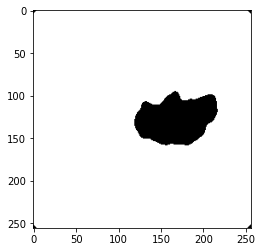

In [86]:
plt.imshow(ls)
plt.imshow(ls,cmap='gray')

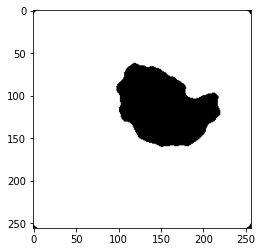

In [85]:
plt.imshow(evolution[11],cmap='gray')

255.0

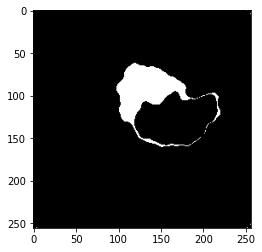

In [88]:
mask_v = 1-ls
mask_h = 1-evolution[11]
mask_a = mask_h - mask_v
plt.imshow(mask_a, cmap='gray')
a = img*mask
mask[150,150]